## Exploratory plots of narwhal acoustic presence and environmental data

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

### Import and format narwhal detection data

In [2]:
# import narwhal acoustic detection data
detections_dir = "D:/Habitat_model_data/narwhal_detections/"

# Kong Oscar 2018 data - AURAL
KO18_narwhal_aural_det = pd.read_csv(detections_dir + 'Kong_Oscar_2018-2019_AuralM2_daily.csv')

# Kong Oscar 2019 data - ST and AURAL
KO19_narwhal_ST_det    = pd.read_csv(detections_dir + 'Nuussuaq_KongOscar_ST_daily.csv')
KO19_narwhal_aural_det = pd.read_csv(detections_dir + 'Nuussuaq_KongOscar_AuralM2_daily.csv')

# Rink 2018 - AURAL
rink18_narwhal_aural_det = pd.read_csv(detections_dir + 'Rink_Glacier_2018-19_AuralM2_daily.csv')

# Fisher Islands/Rink - ST and AURAL
fisher19_narwhal_ST_det    = pd.read_csv(detections_dir + 'Rink_Glacier_Fischer_ST_daily.csv')
fisher19_narwhal_aural_det = pd.read_csv(detections_dir + 'Rink_Glacier_Fischer_AuralM2_daily.csv')

# Sverdrup - AURAL
sver18_narwhal_aural_det = pd.read_csv(detections_dir + 'Sverdrup2018-19_AuralM2_daily.csv')

In [3]:
def csv_to_datetime(detections_csv):
    date_time_str = detections_csv['Time_UTC'].tolist()
    dates = []
    for date in date_time_str:
        tmp = datetime.strptime(date, '%Y/%b/%d %H:%M:%S')
        dates.append(np.datetime64(tmp))
    dates_array = np.array(dates)
    return dates_array

### Import and format sea ice concentration data

From Harry: "Note that the sea-ice area has been rounded to the nearest sq km. Since each grid cell has an area of roughly 10 km^2, there's no point in keeping decimal places.

Following is the number of grid cells and their total area that contribute to the sea-ice area calculation:
- Sverdrup  53   533
- Kong Oscar  90   906
- Fisher Islands  94   947

In other words, there are 53 grid cells inside the Sverdrup circle that are used for calculating sea-ice area, and their total area is 533 km^2. So if we let A = the sea-ice area in Column 4 of the spreadsheet, then 100 x (A/533) is the percent of the area covered by sea ice. Similarly, to normalize Kong Oscar you would calculate 100 x (area/906) and for Fisher Islands it would be 100 x (area/947).

There are missing values in the time series at 2018-8-15 and 2018-12-16. For some reason there is no satellite data on those days. In the spreadsheet, you'll find a value of -100 for the sea-ice area on those days. So if you plot up the numbers, that's why you get two days with negative area!"

In [4]:
# import sea ice area data (from Harry Stern)
sea_ice_area = pd.read_csv('D:/Habitat_model_data/sea_ice_cover/Melville_sea_ice_area.csv')

In [5]:
# sea ice area (in square km for each circle with a 30 km radius around each mooring site)
# -100 is a filler, so replace these with np.nan
sver_ice   = pd.DataFrame(sea_ice_area['sverdrup']).replace(-100, np.nan)
ko_ice     = pd.DataFrame(sea_ice_area['kong_oscar']).replace(-100, np.nan)
fisher_ice = pd.DataFrame(sea_ice_area['fisher']).replace(-100, np.nan)

In [6]:
# then interpolate between neighboring values to fill nans
# calculate sea ice cover (%) from area
sver_ice_percent   = sver_ice.interpolate().iloc[:,0].to_numpy()/533*100
ko_ice_percent     = ko_ice.interpolate().iloc[:,0].to_numpy()/906*100
fisher_ice_percent = fisher_ice.interpolate().iloc[:,0].to_numpy()/947*100

In [7]:
# format time fields from csv
years  = np.array(sea_ice_area['year'])
months = np.array(sea_ice_area['month'])
days   = np.array(sea_ice_area['day'])

dates_list = []
for i in range(len(years)):
    if months[i] < 10: month_str = f'0{months[i]}'
    else: month_str = months[i]
    if days[i] < 10: day_str   = f'0{days[i]}'
    else: day_str = days[i]
    
    date_str = f'{years[i]}-{month_str}-{day_str}'
    dates_list.append(date_str)

dates_dt64 = np.array(dates_list, dtype='datetime64')

Export sea ice data to csv

In [8]:
fisher_ice_df_1D = pd.DataFrame({'time': dates_dt64, 'ice_cover_percent': fisher_ice_percent})
ko_ice_df_1D     = pd.DataFrame({'time': dates_dt64, 'ice_cover_percent': ko_ice_percent})
sver_ice_df_1D   = pd.DataFrame({'time': dates_dt64, 'ice_cover_percent': sver_ice_percent})

In [9]:
fisher_ice_df_1D.to_csv('D:/Habitat_model_data/sea_ice_cover/fisher_seaice_cover_1D.csv', index=False)
ko_ice_df_1D.to_csv('D:/Habitat_model_data/sea_ice_cover/kongoscar_seaice_cover_1D.csv', index=False)
sver_ice_df_1D.to_csv('D:/Habitat_model_data/sea_ice_cover/sverdrup_seaice_cover_1D.csv', index=False)

#### Kong Oscar

In [10]:
KO18_aural_dates_array = csv_to_datetime(KO18_narwhal_aural_det)
KO18_aural_narwhal_det_array = KO18_narwhal_aural_det['narwhal'].to_numpy()

KO18_aural_narwhal_dates = KO18_aural_dates_array[KO18_aural_narwhal_det_array == 1] # identify dates when narwhal were detected

In [11]:
KO19_ST_dates_array = csv_to_datetime(KO19_narwhal_ST_det)
KO19_ST_narwhal_det_array = KO19_narwhal_ST_det['narwhal'].to_numpy()

KO19_ST_narwhal_dates = KO19_ST_dates_array[KO19_ST_narwhal_det_array == 1] # identify dates when narwhal were detected

In [12]:
KO19_aural_dates_array = csv_to_datetime(KO19_narwhal_aural_det)
KO19_aural_narwhal_det_array = KO19_narwhal_aural_det['narwhal'].to_numpy()

KO19_aural_narwhal_dates = KO19_aural_dates_array[KO19_aural_narwhal_det_array == 1] # identify dates when narwhal were detected

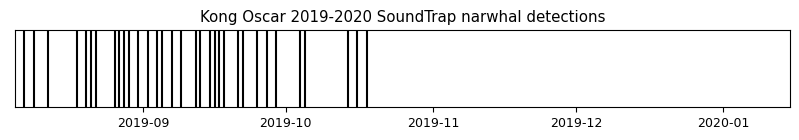

In [14]:
plt.rcParams["figure.figsize"] = (10,1)
plt.rcParams['font.size'] = 9

for xcoord in KO19_ST_narwhal_dates:
    plt.axvline(x=xcoord, color='k') 
plt.xlim(KO19_ST_dates_array[0], KO19_ST_dates_array[-1])
plt.yticks([])

plt.title('Kong Oscar 2019-2020 SoundTrap narwhal detections');

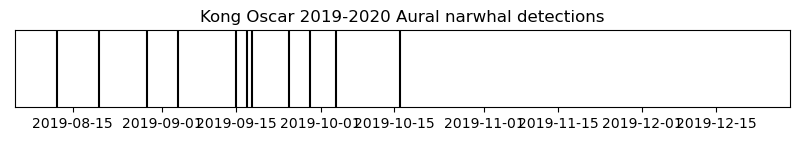

In [15]:
plt.rcParams["figure.figsize"] = (10,1)
plt.rcParams['font.size'] = 10

for xcoord in KO19_aural_narwhal_dates:
    plt.axvline(x=xcoord, color='k') 
plt.xlim(KO19_aural_dates_array[0], KO19_aural_dates_array[-1])
plt.yticks([])
plt.title('Kong Oscar 2019-2020 Aural narwhal detections');

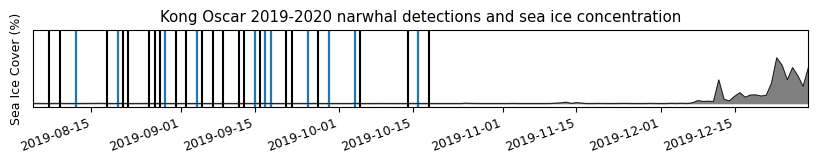

In [22]:
plt.rcParams["figure.figsize"] = (10,1)
plt.rcParams['font.size'] = 9

for xcoord in KO_ST_narwhal_dates:
    plt.axvline(x=xcoord, color='k') 
# plt.xlim(KO_ST_dates_array[0], KO_ST_dates_array[-1])
for xcoord in KO_aural_narwhal_dates:
    plt.axvline(x=xcoord, color='tab:blue') 
plt.xlim(KO_aural_dates_array[0], KO_aural_dates_array[-1])
plt.xticks(rotation = 20, horizontalalignment='right')
plt.yticks([])

# add sea ice concentration
plt.plot(dates_dt64, ko_ice_percent, 'k', linewidth=0.5)
plt.fill_between(dates_dt64, 0, ko_ice_percent, color='gray')
plt.ylabel("Sea Ice Cover (%)")

plt.title('Kong Oscar 2019-2020 narwhal detections and sea ice concentration');

#### Rink

In [13]:
rink_aural_dates_array = csv_to_datetime(rink18_narwhal_aural_det)
rink_aural_narwhal_det_array = rink18_narwhal_aural_det['narwhal'].to_numpy()

rink_aural_narwhal_dates = rink_aural_dates_array[rink_aural_narwhal_det_array == 1] # identify dates when narwhal were detected

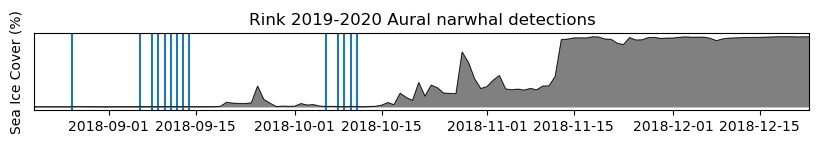

In [93]:
plt.rcParams["figure.figsize"] = (10,1)
plt.rcParams['font.size'] = 10

for xcoord in rink_aural_narwhal_dates:
    plt.axvline(x=xcoord, color='tab:blue') 
plt.xlim(np.datetime64('2018-08-20'), rink_aural_dates_array[-1])
# plt.xlim(rink_aural_dates_array[0], rink_aural_dates_array[-1])
plt.yticks([])

# add sea ice concentration
plt.plot(dates_dt64, fisher_ice_percent, 'k', linewidth=0.5)
plt.fill_between(dates_dt64, 0, fisher_ice_percent, color='gray')
plt.ylabel("Sea Ice Cover (%)")

plt.title('Rink 2019-2020 Aural narwhal detections');

#### Fisher Islands

In [14]:
fisher_ST_dates_array = csv_to_datetime(fisher19_narwhal_ST_det)
fisher_ST_narwhal_det_array = fisher19_narwhal_ST_det['narwhal'].to_numpy()

fisher_ST_narwhal_dates = fisher_ST_dates_array[fisher_ST_narwhal_det_array == 1] # identify dates when narwhal were detected

In [15]:
fisher_aural_dates_array = csv_to_datetime(fisher19_narwhal_aural_det)
fisher_aural_narwhal_det_array = fisher19_narwhal_aural_det['narwhal'].to_numpy()

fisher_aural_narwhal_dates = fisher_aural_dates_array[fisher_aural_narwhal_det_array == 1] # identify dates when narwhal were detected

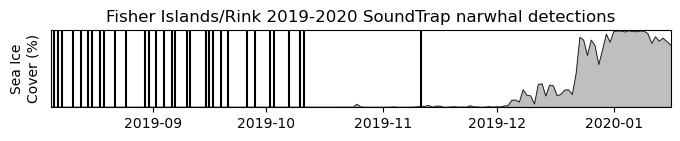

In [26]:
plt.rcParams["figure.figsize"] = (8,1)
plt.rcParams['font.size'] = 10

for xcoord in fisher_ST_narwhal_dates:
    plt.axvline(x=xcoord, color='k') 
plt.xlim(fisher_ST_dates_array[0], fisher_ST_dates_array[-1])
plt.yticks([])

# add sea ice concentration
plt.plot(dates_dt64, fisher_ice_percent, 'k', linewidth=0.5)
plt.fill_between(dates_dt64, 0, fisher_ice_percent, color='gray', alpha=0.5)
plt.ylabel("Sea Ice\nCover (%)")
plt.margins(x=0,y=0)

plt.title('Fisher Islands/Rink 2019-2020 SoundTrap narwhal detections');

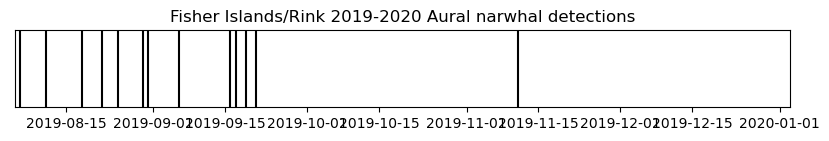

In [28]:
plt.rcParams["figure.figsize"] = (10,1)
plt.rcParams['font.size'] = 10

for xcoord in fisher_aural_narwhal_dates:
    plt.axvline(x=xcoord, color='k') 
plt.xlim(fisher_aural_dates_array[0], fisher_aural_dates_array[-1])
plt.yticks([])
plt.title('Fisher Islands/Rink 2019-2020 Aural narwhal detections');

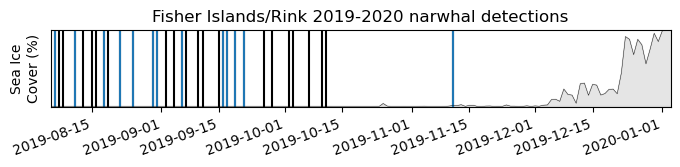

In [29]:
plt.rcParams["figure.figsize"] = (8,1)
plt.rcParams['font.size'] = 10

for xcoord in fisher_ST_narwhal_dates:
    plt.axvline(x=xcoord, color='k') 
plt.xlim(fisher_ST_dates_array[0], fisher_ST_dates_array[-1])
for xcoord in fisher_aural_narwhal_dates:
    plt.axvline(x=xcoord, color='tab:blue') 
plt.xlim(fisher_aural_dates_array[0], fisher_aural_dates_array[-1])
plt.yticks([])
plt.xticks(rotation = 20, horizontalalignment='right')

# add sea ice concentration
plt.plot(dates_dt64, fisher_ice_percent, 'k', linewidth=0.3)
plt.fill_between(dates_dt64, 0, fisher_ice_percent, color='tab:gray', alpha=0.2)
plt.ylabel("Sea Ice\nCover (%)")
plt.margins(x=0,y=0)

plt.title('Fisher Islands/Rink 2019-2020 narwhal detections');

#### Sverdrup

In [16]:
sver18_aural_dates_array = csv_to_datetime(sver18_narwhal_aural_det)
sver18_aural_narwhal_det_array = sver18_narwhal_aural_det['narwhal'].to_numpy()

sver18_aural_narwhal_dates = sver18_aural_dates_array[sver18_aural_narwhal_det_array == 1] # identify dates when narwhal were detected

#### All three sites - detections and sea ice

In [18]:
import numpy as np

def daylength(dayOfYear, lat):
    """
    Computes the length of the day (the time between sunrise and
    sunset) given the day of the year and latitude of the location.
    Function uses the Brock model for the computations.
    For more information see, for example,
    Forsythe et al., "A model comparison for daylength as a
    function of latitude and day of year", Ecological Modelling,
    1995.
    Parameters
    ----------
    dayOfYear : int
        The day of the year. 1 corresponds to 1st of January
        and 365 to 31st December (on a non-leap year).
    lat : float
        Latitude of the location in degrees. Positive values
        for north and negative for south.
    Returns
    -------
    d : float
        Daylength in hours.
    """
    latInRad = np.deg2rad(lat)
    declinationOfEarth = 23.45*np.sin(np.deg2rad(360.0*(283.0+dayOfYear)/365.0))
    if -np.tan(latInRad) * np.tan(np.deg2rad(declinationOfEarth)) <= -1.0:
        return 24.0
    elif -np.tan(latInRad) * np.tan(np.deg2rad(declinationOfEarth)) >= 1.0:
        return 0.0
    else:
        hourAngle = np.rad2deg(np.arccos(-np.tan(latInRad) * np.tan(np.deg2rad(declinationOfEarth))))
        return 2.0*hourAngle/15.0

In [19]:
daylength_hrs = []

for i in range(365):
    daylength_hrs_tmp = daylength(i, 75)
    daylength_hrs.append(daylength_hrs_tmp)
daylength_hrs_array = np.array(daylength_hrs)

In [20]:
datelist18 = pd.date_range('2018-01-01', periods=365).tolist()
datelist19 = pd.date_range('2019-01-01', periods=365).tolist()
datelist20 = pd.date_range('2020-01-01', periods=365).tolist()

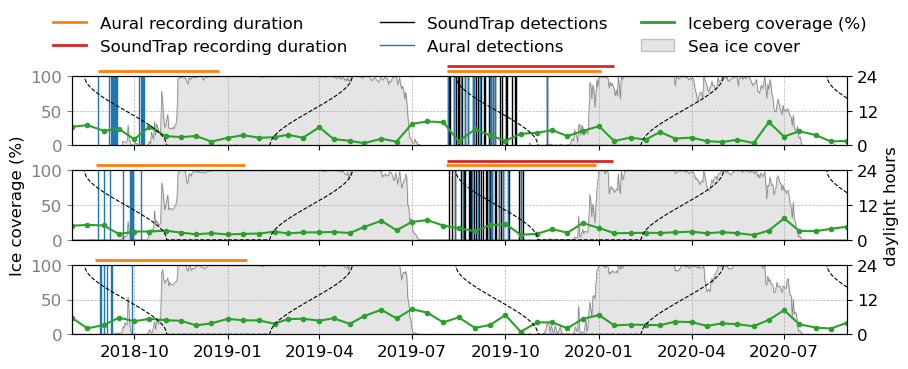

In [82]:
##### plt.rcParams["figure.figsize"] = (10,2)
plt.rcParams["figure.figsize"] = (10,2)
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(9, sharex=True, sharey=False, gridspec_kw={'height_ratios': [0.4,0.4,6,0.4,0.4,6,0.4,0.4,6]})
# fig.suptitle('Sea Ice Cover in Melville Bay Fjords')

plt.subplots_adjust(top=1.5, hspace=0.2)
ax1.set_xlim(np.datetime64('2018-08-01'), np.datetime64('2020-09-01'))

# RINK/FISHER ====
ax1.axis('off') # filler axis
legend_elements = [Line2D([0], [0], color='tab:orange', lw=2, label='Aural recording duration'),
                   Line2D([0], [0], color='tab:red', lw=2, label='SoundTrap recording duration'),
                   Line2D([0], [0], color='k', lw=1, label='SoundTrap detections'),
                   Line2D([0], [0], color='tab:blue', lw=1, label='Aural detections'),
                   Line2D([0], [0], color='tab:green', lw=2, label='Iceberg coverage (%)'),
                   Patch(facecolor='tab:gray', alpha=0.2, edgecolor='k', label='Sea ice cover')]
ax1.legend(handles=legend_elements, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 13),frameon=False)
# ax1.set_title("Rink Glacier and Fisher Islands")
ax2.hlines(y=0, xmin=rink_aural_dates_array[0], xmax=rink_aural_dates_array[-1],linewidth=2, color='tab:orange', clip_on=False)
ax2.hlines(y=0, xmin=fisher_aural_dates_array[0], xmax=fisher_aural_dates_array[-1],linewidth=2, color='tab:orange', clip_on=False)
ax2.hlines(y=1, xmin=fisher_ST_dates_array[0], xmax=fisher_ST_dates_array[-1],linewidth=2, color='tab:red', clip_on=False)
ax2.set_ylim(0,1)
ax2.axis('off')

ax3.plot(dates_dt64, fisher_ice_percent, 'tab:gray', linewidth=0.5)
ax3.fill_between(dates_dt64, 0, fisher_ice_percent, color='tab:gray', alpha=0.2)
ax3.tick_params(axis='y', colors='tab:gray')
ax3.grid(linestyle='--', linewidth=0.5)
ax3.margins(x=0,y=0)
# add narwhal detections ----
for xcoord in rink_aural_narwhal_dates:
    ax3.axvline(x=xcoord, color='tab:blue', linewidth=1)
for xcoord in fisher_ST_narwhal_dates:
    ax3.axvline(x=xcoord, color='k', linewidth=1)
for xcoord in fisher_aural_narwhal_dates:
    ax3.axvline(x=xcoord, color='tab:blue', linewidth=1)
# add day length
ax3_twin = ax3.twinx()  
ax3_twin.set_ylim(0, 24);
# ax3_twin.set_ylabel("daylight hours")
ax3_twin.set_yticks([0,12,24])
ax3_twin.plot(datelist18,daylength_hrs_array,'k--', linewidth=0.8)
ax3_twin.plot(datelist19,daylength_hrs_array,'k--', linewidth=0.8)
ax3_twin.plot(datelist20,daylength_hrs_array,'k--', linewidth=0.8)

# KONG OSCAR ====
ax4.axis('off') # filler axis
# ax5.set_title("Kong Oscar Glacier")
ax5.hlines(y=0, xmin=KO18_aural_dates_array[0], xmax=KO18_aural_dates_array[-1], linewidth=2, color='tab:orange', clip_on=False, label='Aural start/end')
ax5.hlines(y=0, xmin=KO19_aural_dates_array[0], xmax=KO19_aural_dates_array[-1], linewidth=2, color='tab:orange', clip_on=False, label='Aural start/end')
ax5.hlines(y=1, xmin=KO19_ST_dates_array[0], xmax=KO19_ST_dates_array[-1], linewidth=2, color='tab:red', clip_on=False, label='SoundTrap start/end')
ax5.set_ylim(0,1)
ax5.axis('off')

ax6.plot(dates_dt64, ko_ice_percent, 'tab:gray', linewidth=0.5)
ax6.fill_between(dates_dt64, 0, ko_ice_percent, color='tab:gray', alpha=0.2)
# ax6.set_ylabel("Sea Ice Cover (%)", color='tab:gray')
ax6.set_ylabel("Ice coverage (%)", color='k')
ax6.grid(linestyle='--', linewidth=0.5)
ax6.tick_params(axis='y', colors='tab:gray')
ax6.margins(x=0,y=0)
# add narwhal detections ----
for xcoord in KO18_aural_narwhal_dates:
    ax6.axvline(x=xcoord, color='tab:blue', linewidth=1)
for xcoord in KO19_ST_narwhal_dates:
    ax6.axvline(x=xcoord, color='k', linewidth=1) 
# plt.xlim(KO_ST_dates_array[0], KO_ST_dates_array[-1])
for xcoord in KO19_aural_narwhal_dates:
    ax6.axvline(x=xcoord, color='tab:blue', linewidth=1)
# add day length
ax6_twin = ax6.twinx()  
ax6_twin.set_ylim(0, 24);
ax6_twin.set_ylabel("daylight hours")
ax6_twin.set_yticks([0,12,24])
ax6_twin.plot(datelist18,daylength_hrs_array,'k--', linewidth=0.8)
ax6_twin.plot(datelist19,daylength_hrs_array,'k--', linewidth=0.8)
ax6_twin.plot(datelist20,daylength_hrs_array,'k--', linewidth=0.8)

# # legend
# ax2.axvline(x=KO_ST_narwhal_dates[0], color='k', linewidth=1, label='SoundTrap detections')
# ax2.axvline(x=KO_aural_narwhal_dates[0], color='tab:blue', linewidth=1, label='Aural detections')
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# SVERDRUP ====
ax7.axis('off') # filler axis
# ax83.set_title("Sverdrup Glacier")
ax8.hlines(y=0, xmin=sver18_aural_dates_array[0], xmax=sver18_aural_dates_array[-1], linewidth=2, color='tab:orange', clip_on=False, label='Aural start/end')
ax8.set_ylim(0,1)
ax8.axis('off')
# add narwhal detections ----
for xcoord in sver18_aural_narwhal_dates:
    ax9.axvline(x=xcoord, color='tab:blue', linewidth=1)
ax9.plot(dates_dt64, sver_ice_percent, 'tab:gray', linewidth=0.5)
ax9.fill_between(dates_dt64, 0, sver_ice_percent, color='tab:gray', alpha=0.2)
ax9.tick_params(axis='y', colors='tab:gray')
ax9.grid(linestyle='--', linewidth=0.5)
ax9.margins(x=0,y=0)
# add day length
ax9_twin = ax9.twinx()  
ax9_twin.set_ylim(0, 24)
ax9_twin.set_yticks([0,12,24])
ax9_twin.plot(datelist18,daylength_hrs_array,'k--', linewidth=0.8)
ax9_twin.plot(datelist19,daylength_hrs_array,'k--', linewidth=0.8)
ax9_twin.plot(datelist20,daylength_hrs_array,'k--', linewidth=0.8)

plt.xlabel("Month");

# add iceberg data
ax3.plot(np.array(iceberg_rink_df['time'], dtype='datetime64'), iceberg_rink_df['iceberg_percent'],'o-',color='tab:green', markersize=3)
ax6.plot(np.array(iceberg_sver_df['time'], dtype='datetime64'), iceberg_sver_df['iceberg_percent'],'o-',color='tab:green', markersize=3)
ax9.plot(np.array(iceberg_kong_df['time'], dtype='datetime64'), iceberg_kong_df['iceberg_percent'],'o-',color='tab:green', markersize=3);

# ax3.set_ylim(0,50)
# ax6.set_ylim(0,50)
# ax9.set_ylim(0,50)

# plt.savefig('Figures/melville_sea_ice_conc.png', bbox_inches='tight', dpi=300, facecolor='white')

### Import runoff data

In [4]:
runoff_dir = 'D:/Habitat_model_data/covariate_csv_files/runoff/'

runoff_mar_kong = pd.read_csv(runoff_dir + 'kongoscar_runoff_mar_1D.csv')
runoff_racmo_kong = pd.read_csv(runoff_dir + 'kongoscar_runoff_racmo_1D.csv')
runoff_mar_rink = pd.read_csv(runoff_dir + 'rink_runoff_mar_1D.csv')
runoff_racmo_rink = pd.read_csv(runoff_dir + 'rink_runoff_racmo_1D.csv')
runoff_mar_sver = pd.read_csv(runoff_dir + 'sverdrup_runoff_mar_1D.csv')
runoff_racmo_sver = pd.read_csv(runoff_dir + 'sverdrup_runoff_racmo_1D.csv')

In [8]:
np.array(runoff_mar_kong['time'], dtype='datetime64')

array(['2018-01-01', '2018-01-02', '2018-01-03', ..., '2020-12-29',
       '2020-12-30', '2020-12-31'], dtype='datetime64[D]')

#### Overlay narwhal detections on runoff data

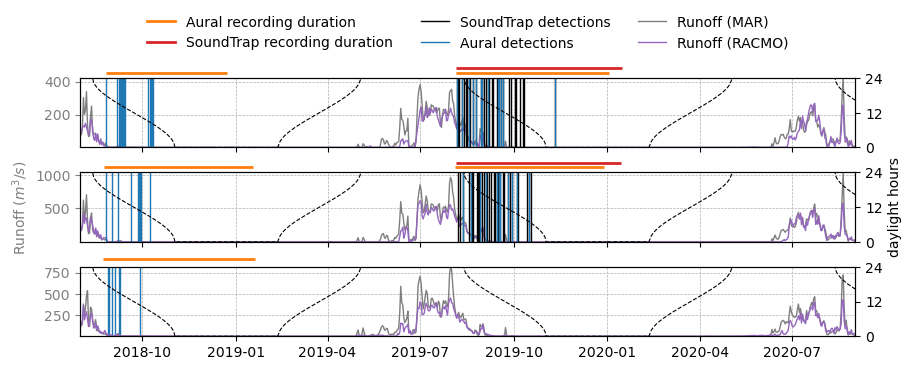

In [35]:
plt.rcParams["figure.figsize"] = (10,2)
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(9, sharex=True, sharey=False, gridspec_kw={'height_ratios': [0.4,0.4,6,0.4,0.4,6,0.4,0.4,6]})
# fig.suptitle('Sea Ice Cover in Melville Bay Fjords')

plt.subplots_adjust(top=1.5, hspace=0.2)
ax1.set_xlim(np.datetime64('2018-08-01'), np.datetime64('2020-09-01'))

# RINK/FISHER ==================================================================================
ax1.axis('off') # filler axis
legend_elements = [Line2D([0], [0], color='tab:orange', lw=2, label='Aural recording duration'),
                   Line2D([0], [0], color='tab:red', lw=2, label='SoundTrap recording duration'),
                   Line2D([0], [0], color='k', lw=1, label='SoundTrap detections'),
                   Line2D([0], [0], color='tab:blue', lw=1, label='Aural detections'),
                   Line2D([0], [0], color='tab:gray', lw=1, label='Runoff (MAR)'),
                   Line2D([0], [0], color='tab:purple', lw=1, label='Runoff (RACMO)')]
ax1.legend(handles=legend_elements, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 13),frameon=False)
# ax1.set_title("Rink Glacier and Fisher Islands")
ax2.hlines(y=0, xmin=rink_aural_dates_array[0], xmax=rink_aural_dates_array[-1],linewidth=2, color='tab:orange', clip_on=False)
ax2.hlines(y=0, xmin=fisher_aural_dates_array[0], xmax=fisher_aural_dates_array[-1],linewidth=2, color='tab:orange', clip_on=False)
ax2.hlines(y=1, xmin=fisher_ST_dates_array[0], xmax=fisher_ST_dates_array[-1],linewidth=2, color='tab:red', clip_on=False)
# ax2.set_ylim(0,1)
ax2.axis('off')

# add runoff - MAR ----------------
ax3.plot(np.array(runoff_mar_rink['time'], dtype='datetime64'), runoff_mar_rink['runoff'].values, 'tab:gray', linewidth=1)
# add runoff - RACMO
ax3.plot(np.array(runoff_racmo_rink['time'], dtype='datetime64'), runoff_racmo_rink['runoff'].values, 'tab:purple', linewidth=1)
ax3.tick_params(axis='y', colors='tab:gray')
ax3.grid(linestyle='--', linewidth=0.5)
ax3.margins(x=0,y=0)

# add narwhal detections ---------
for xcoord in rink_aural_narwhal_dates:
    ax3.axvline(x=xcoord, color='tab:blue', linewidth=1)
for xcoord in fisher_ST_narwhal_dates:
    ax3.axvline(x=xcoord, color='k', linewidth=1)
for xcoord in fisher_aural_narwhal_dates:
    ax3.axvline(x=xcoord, color='tab:blue', linewidth=1)
# add day length
ax3_twin = ax3.twinx()  
ax3_twin.set_ylim(0, 24);

# ax3_twin.set_ylabel("daylight hours")
ax3_twin.set_yticks([0,12,24])
ax3_twin.plot(datelist18,daylength_hrs_array,'k--', linewidth=0.8)
ax3_twin.plot(datelist19,daylength_hrs_array,'k--', linewidth=0.8)
ax3_twin.plot(datelist20,daylength_hrs_array,'k--', linewidth=0.8)

# KONG OSCAR ==================================================================================
ax4.axis('off') # filler axis
# ax5.set_title("Kong Oscar Glacier")
ax5.hlines(y=0, xmin=KO18_aural_dates_array[0], xmax=KO18_aural_dates_array[-1], linewidth=2, color='tab:orange', clip_on=False, label='Aural start/end')
ax5.hlines(y=0, xmin=KO19_aural_dates_array[0], xmax=KO19_aural_dates_array[-1], linewidth=2, color='tab:orange', clip_on=False, label='Aural start/end')
ax5.hlines(y=1, xmin=KO19_ST_dates_array[0], xmax=KO19_ST_dates_array[-1], linewidth=2, color='tab:red', clip_on=False, label='SoundTrap start/end')
# ax5.set_ylim(0,1)
ax5.axis('off')

# add runoff - MAR ----------------
ax6.plot(np.array(runoff_mar_kong['time'], dtype='datetime64'), runoff_mar_kong['runoff'].values, 'tab:gray', linewidth=1)
# add runoff - RACMO
ax6.plot(np.array(runoff_racmo_kong['time'], dtype='datetime64'), runoff_racmo_kong['runoff'].values, 'tab:purple', linewidth=1)

ax6.set_ylabel("Runoff ($m^3/s$)", color='tab:gray')
ax6.grid(linestyle='--', linewidth=0.5)
ax6.tick_params(axis='y', colors='tab:gray')
ax6.margins(x=0,y=0)
# add narwhal detections ----------
for xcoord in KO18_aural_narwhal_dates:
    ax6.axvline(x=xcoord, color='tab:blue', linewidth=1)
for xcoord in KO19_ST_narwhal_dates:
    ax6.axvline(x=xcoord, color='k', linewidth=1) 
# plt.xlim(KO_ST_dates_array[0], KO_ST_dates_array[-1])
for xcoord in KO19_aural_narwhal_dates:
    ax6.axvline(x=xcoord, color='tab:blue', linewidth=1)
    
# add day length
ax6_twin = ax6.twinx()  
ax6_twin.set_ylim(0, 24);
ax6_twin.set_ylabel("daylight hours")
ax6_twin.set_yticks([0,12,24])
ax6_twin.plot(datelist18,daylength_hrs_array,'k--', linewidth=0.8)
ax6_twin.plot(datelist19,daylength_hrs_array,'k--', linewidth=0.8)
ax6_twin.plot(datelist20,daylength_hrs_array,'k--', linewidth=0.8)

# # legend
# ax2.axvline(x=KO_ST_narwhal_dates[0], color='k', linewidth=1, label='SoundTrap detections')
# ax2.axvline(x=KO_aural_narwhal_dates[0], color='tab:blue', linewidth=1, label='Aural detections')
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# SVERDRUP ==================================================================================
ax7.axis('off') # filler axis
# ax83.set_title("Sverdrup Glacier")
ax8.hlines(y=0, xmin=sver18_aural_dates_array[0], xmax=sver18_aural_dates_array[-1], linewidth=2, color='tab:orange', clip_on=False, label='Aural start/end')
# ax8.set_ylim(0,1)
ax8.axis('off')
# add narwhal detections -------
for xcoord in sver18_aural_narwhal_dates:
    ax9.axvline(x=xcoord, color='tab:blue', linewidth=1)
    
# add runoff - MAR --------------
ax9.plot(np.array(runoff_mar_sver['time'], dtype='datetime64'), runoff_mar_sver['runoff'].values, 'tab:gray', linewidth=1)
# add runoff - RACMO
ax9.plot(np.array(runoff_racmo_sver['time'], dtype='datetime64'), runoff_racmo_sver['runoff'].values, 'tab:purple', linewidth=1)

ax9.tick_params(axis='y', colors='tab:gray')
ax9.grid(linestyle='--', linewidth=0.5)
ax9.margins(x=0,y=0)

# add day length
ax9_twin = ax9.twinx()  
ax9_twin.set_ylim(0, 24)
ax9_twin.set_yticks([0,12,24])
ax9_twin.plot(datelist18,daylength_hrs_array,'k--', linewidth=0.8)
ax9_twin.plot(datelist19,daylength_hrs_array,'k--', linewidth=0.8)
ax9_twin.plot(datelist20,daylength_hrs_array,'k--', linewidth=0.8)

plt.xlabel("Month");

plt.savefig('Figures/melville_runoff-detections.png', bbox_inches='tight', dpi=300, facecolor='white')

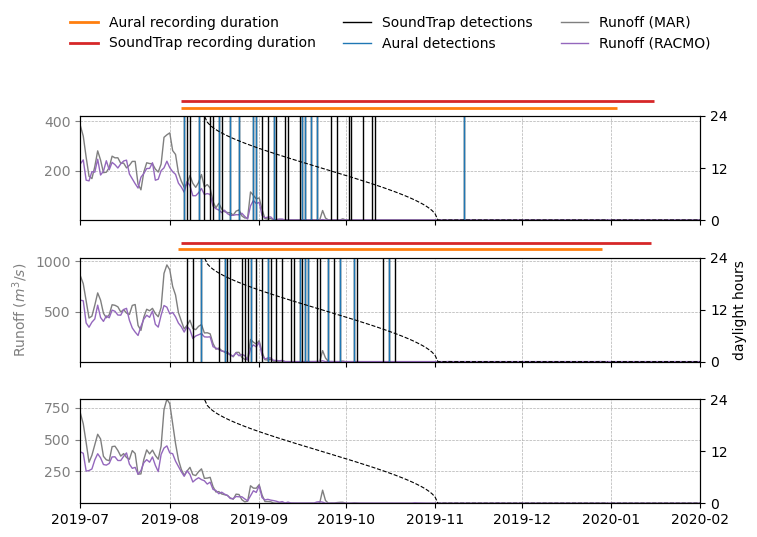

In [39]:
plt.rcParams["figure.figsize"] = (8,3)
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(9, sharex=True, sharey=False, gridspec_kw={'height_ratios': [0.4,0.4,6,0.4,0.4,6,0.4,0.4,6]})
# fig.suptitle('Sea Ice Cover in Melville Bay Fjords')

plt.subplots_adjust(top=1.5, hspace=0.2)
ax1.set_xlim(np.datetime64('2019-07-01'), np.datetime64('2020-02-01'))

# RINK/FISHER ==================================================================================
ax1.axis('off') # filler axis
legend_elements = [Line2D([0], [0], color='tab:orange', lw=2, label='Aural recording duration'),
                   Line2D([0], [0], color='tab:red', lw=2, label='SoundTrap recording duration'),
                   Line2D([0], [0], color='k', lw=1, label='SoundTrap detections'),
                   Line2D([0], [0], color='tab:blue', lw=1, label='Aural detections'),
                   Line2D([0], [0], color='tab:gray', lw=1, label='Runoff (MAR)'),
                   Line2D([0], [0], color='tab:purple', lw=1, label='Runoff (RACMO)')]
ax1.legend(handles=legend_elements, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 13),frameon=False)
# ax1.set_title("Rink Glacier and Fisher Islands")
ax2.hlines(y=0, xmin=rink_aural_dates_array[0], xmax=rink_aural_dates_array[-1],linewidth=2, color='tab:orange', clip_on=False)
ax2.hlines(y=0, xmin=fisher_aural_dates_array[0], xmax=fisher_aural_dates_array[-1],linewidth=2, color='tab:orange', clip_on=False)
ax2.hlines(y=1, xmin=fisher_ST_dates_array[0], xmax=fisher_ST_dates_array[-1],linewidth=2, color='tab:red', clip_on=False)
# ax2.set_ylim(0,1)
ax2.axis('off')

# add runoff - MAR ----------------
ax3.plot(np.array(runoff_mar_rink['time'], dtype='datetime64'), runoff_mar_rink['runoff'].values, 'tab:gray', linewidth=1)
# add runoff - RACMO
ax3.plot(np.array(runoff_racmo_rink['time'], dtype='datetime64'), runoff_racmo_rink['runoff'].values, 'tab:purple', linewidth=1)
ax3.tick_params(axis='y', colors='tab:gray')
ax3.grid(linestyle='--', linewidth=0.5)
ax3.margins(x=0,y=0)

# add narwhal detections ---------
for xcoord in rink_aural_narwhal_dates:
    ax3.axvline(x=xcoord, color='tab:blue', linewidth=1)
for xcoord in fisher_ST_narwhal_dates:
    ax3.axvline(x=xcoord, color='k', linewidth=1)
for xcoord in fisher_aural_narwhal_dates:
    ax3.axvline(x=xcoord, color='tab:blue', linewidth=1)
# add day length
ax3_twin = ax3.twinx()  
ax3_twin.set_ylim(0, 24);

# ax3_twin.set_ylabel("daylight hours")
ax3_twin.set_yticks([0,12,24])
ax3_twin.plot(datelist18,daylength_hrs_array,'k--', linewidth=0.8)
ax3_twin.plot(datelist19,daylength_hrs_array,'k--', linewidth=0.8)
ax3_twin.plot(datelist20,daylength_hrs_array,'k--', linewidth=0.8)

# KONG OSCAR ==================================================================================
ax4.axis('off') # filler axis
# ax5.set_title("Kong Oscar Glacier")
ax5.hlines(y=0, xmin=KO18_aural_dates_array[0], xmax=KO18_aural_dates_array[-1], linewidth=2, color='tab:orange', clip_on=False, label='Aural start/end')
ax5.hlines(y=0, xmin=KO19_aural_dates_array[0], xmax=KO19_aural_dates_array[-1], linewidth=2, color='tab:orange', clip_on=False, label='Aural start/end')
ax5.hlines(y=1, xmin=KO19_ST_dates_array[0], xmax=KO19_ST_dates_array[-1], linewidth=2, color='tab:red', clip_on=False, label='SoundTrap start/end')
# ax5.set_ylim(0,1)
ax5.axis('off')

# add runoff - MAR ----------------
ax6.plot(np.array(runoff_mar_kong['time'], dtype='datetime64'), runoff_mar_kong['runoff'].values, 'tab:gray', linewidth=1)
# add runoff - RACMO
ax6.plot(np.array(runoff_racmo_kong['time'], dtype='datetime64'), runoff_racmo_kong['runoff'].values, 'tab:purple', linewidth=1)

ax6.set_ylabel("Runoff ($m^3/s$)", color='tab:gray')
ax6.grid(linestyle='--', linewidth=0.5)
ax6.tick_params(axis='y', colors='tab:gray')
ax6.margins(x=0,y=0)
# add narwhal detections ----------
for xcoord in KO18_aural_narwhal_dates:
    ax6.axvline(x=xcoord, color='tab:blue', linewidth=1)
for xcoord in KO19_ST_narwhal_dates:
    ax6.axvline(x=xcoord, color='k', linewidth=1) 
# plt.xlim(KO_ST_dates_array[0], KO_ST_dates_array[-1])
for xcoord in KO19_aural_narwhal_dates:
    ax6.axvline(x=xcoord, color='tab:blue', linewidth=1)
    
# add day length
ax6_twin = ax6.twinx()  
ax6_twin.set_ylim(0, 24);
ax6_twin.set_ylabel("daylight hours")
ax6_twin.set_yticks([0,12,24])
ax6_twin.plot(datelist18,daylength_hrs_array,'k--', linewidth=0.8)
ax6_twin.plot(datelist19,daylength_hrs_array,'k--', linewidth=0.8)
ax6_twin.plot(datelist20,daylength_hrs_array,'k--', linewidth=0.8)

# # legend
# ax2.axvline(x=KO_ST_narwhal_dates[0], color='k', linewidth=1, label='SoundTrap detections')
# ax2.axvline(x=KO_aural_narwhal_dates[0], color='tab:blue', linewidth=1, label='Aural detections')
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# SVERDRUP ==================================================================================
ax7.axis('off') # filler axis
# ax83.set_title("Sverdrup Glacier")
ax8.hlines(y=0, xmin=sver18_aural_dates_array[0], xmax=sver18_aural_dates_array[-1], linewidth=2, color='tab:orange', clip_on=False, label='Aural start/end')
# ax8.set_ylim(0,1)
ax8.axis('off')
# add narwhal detections -------
for xcoord in sver18_aural_narwhal_dates:
    ax9.axvline(x=xcoord, color='tab:blue', linewidth=1)
    
# add runoff - MAR --------------
ax9.plot(np.array(runoff_mar_sver['time'], dtype='datetime64'), runoff_mar_sver['runoff'].values, 'tab:gray', linewidth=1)
# add runoff - RACMO
ax9.plot(np.array(runoff_racmo_sver['time'], dtype='datetime64'), runoff_racmo_sver['runoff'].values, 'tab:purple', linewidth=1)

ax9.tick_params(axis='y', colors='tab:gray')
ax9.grid(linestyle='--', linewidth=0.5)
ax9.margins(x=0,y=0)

# add day length
ax9_twin = ax9.twinx()  
ax9_twin.set_ylim(0, 24)
ax9_twin.set_yticks([0,12,24])
ax9_twin.plot(datelist18,daylength_hrs_array,'k--', linewidth=0.8)
ax9_twin.plot(datelist19,daylength_hrs_array,'k--', linewidth=0.8)
ax9_twin.plot(datelist20,daylength_hrs_array,'k--', linewidth=0.8)

plt.xlabel("Month");

plt.savefig('Figures/melville_runoff-detections_zoom.png', bbox_inches='tight', dpi=300, facecolor='white')

### Import iceberg data

In [24]:
iceberg_df = pd.read_csv('D:/Habitat_model_data/covariate_csv_files/iceberg_concentration/iceberg_conc.csv',index_col=0)

In [35]:
iceberg_rink_df = iceberg_df[iceberg_df['site']=='rink']
iceberg_kong_df = iceberg_df[iceberg_df['site']=='kong']
iceberg_sver_df = iceberg_df[iceberg_df['site']=='sver']

#### Overlay narwhal detections on iceberg data

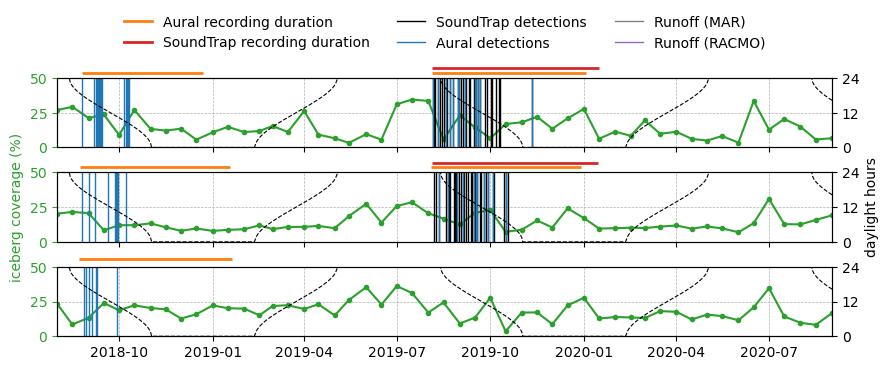

In [51]:
plt.rcParams["figure.figsize"] = (10,2)
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(9, sharex=True, sharey=False, gridspec_kw={'height_ratios': [0.4,0.4,6,0.4,0.4,6,0.4,0.4,6]})
# fig.suptitle('Sea Ice Cover in Melville Bay Fjords')

plt.subplots_adjust(top=1.5, hspace=0.2)
ax1.set_xlim(np.datetime64('2018-08-01'), np.datetime64('2020-09-01'))

# add iceberg data
ax3.plot(np.array(iceberg_rink_df['time'], dtype='datetime64'), iceberg_rink_df['iceberg_percent'],'o-',color='tab:green', markersize=3)
ax6.plot(np.array(iceberg_sver_df['time'], dtype='datetime64'), iceberg_sver_df['iceberg_percent'],'o-',color='tab:green', markersize=3)
ax9.plot(np.array(iceberg_kong_df['time'], dtype='datetime64'), iceberg_kong_df['iceberg_percent'],'o-',color='tab:green', markersize=3);

ax3.set_ylim(0,50)
ax6.set_ylim(0,50)
ax9.set_ylim(0,50)

# RINK/FISHER ==================================================================================
ax1.axis('off') # filler axis
legend_elements = [Line2D([0], [0], color='tab:orange', lw=2, label='Aural recording duration'),
                   Line2D([0], [0], color='tab:red', lw=2, label='SoundTrap recording duration'),
                   Line2D([0], [0], color='k', lw=1, label='SoundTrap detections'),
                   Line2D([0], [0], color='tab:blue', lw=1, label='Aural detections'),
                   Line2D([0], [0], color='tab:gray', lw=1, label='Runoff (MAR)'),
                   Line2D([0], [0], color='tab:purple', lw=1, label='Runoff (RACMO)')]
ax1.legend(handles=legend_elements, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 13),frameon=False)
# ax1.set_title("Rink Glacier and Fisher Islands")
ax2.hlines(y=0, xmin=rink_aural_dates_array[0], xmax=rink_aural_dates_array[-1],linewidth=2, color='tab:orange', clip_on=False)
ax2.hlines(y=0, xmin=fisher_aural_dates_array[0], xmax=fisher_aural_dates_array[-1],linewidth=2, color='tab:orange', clip_on=False)
ax2.hlines(y=1, xmin=fisher_ST_dates_array[0], xmax=fisher_ST_dates_array[-1],linewidth=2, color='tab:red', clip_on=False)
# ax2.set_ylim(0,1)
ax2.axis('off')

ax3.tick_params(axis='y', colors='tab:green')
ax3.grid(linestyle='--', linewidth=0.5)
ax3.margins(x=0,y=0)

# add narwhal detections ---------
for xcoord in rink_aural_narwhal_dates:
    ax3.axvline(x=xcoord, color='tab:blue', linewidth=1)
for xcoord in fisher_ST_narwhal_dates:
    ax3.axvline(x=xcoord, color='k', linewidth=1)
for xcoord in fisher_aural_narwhal_dates:
    ax3.axvline(x=xcoord, color='tab:blue', linewidth=1)
# add day length
ax3_twin = ax3.twinx()  
ax3_twin.set_ylim(0, 24);

# ax3_twin.set_ylabel("daylight hours")
ax3_twin.set_yticks([0,12,24])
ax3_twin.plot(datelist18,daylength_hrs_array,'k--', linewidth=0.8)
ax3_twin.plot(datelist19,daylength_hrs_array,'k--', linewidth=0.8)
ax3_twin.plot(datelist20,daylength_hrs_array,'k--', linewidth=0.8)

# KONG OSCAR ==================================================================================
ax4.axis('off') # filler axis
# ax5.set_title("Kong Oscar Glacier")
ax5.hlines(y=0, xmin=KO18_aural_dates_array[0], xmax=KO18_aural_dates_array[-1], linewidth=2, color='tab:orange', clip_on=False, label='Aural start/end')
ax5.hlines(y=0, xmin=KO19_aural_dates_array[0], xmax=KO19_aural_dates_array[-1], linewidth=2, color='tab:orange', clip_on=False, label='Aural start/end')
ax5.hlines(y=1, xmin=KO19_ST_dates_array[0], xmax=KO19_ST_dates_array[-1], linewidth=2, color='tab:red', clip_on=False, label='SoundTrap start/end')
# ax5.set_ylim(0,1)
ax5.axis('off')

ax6.set_ylabel("iceberg coverage (%)", color='tab:green')
ax6.grid(linestyle='--', linewidth=0.5)
ax6.tick_params(axis='y', colors='tab:green')
ax6.margins(x=0,y=0)
# add narwhal detections ----------
for xcoord in KO18_aural_narwhal_dates:
    ax6.axvline(x=xcoord, color='tab:blue', linewidth=1)
for xcoord in KO19_ST_narwhal_dates:
    ax6.axvline(x=xcoord, color='k', linewidth=1) 
# plt.xlim(KO_ST_dates_array[0], KO_ST_dates_array[-1])
for xcoord in KO19_aural_narwhal_dates:
    ax6.axvline(x=xcoord, color='tab:blue', linewidth=1)
    
# add day length
ax6_twin = ax6.twinx()  
ax6_twin.set_ylim(0, 24);
ax6_twin.set_ylabel("daylight hours")
ax6_twin.set_yticks([0,12,24])
ax6_twin.plot(datelist18,daylength_hrs_array,'k--', linewidth=0.8)
ax6_twin.plot(datelist19,daylength_hrs_array,'k--', linewidth=0.8)
ax6_twin.plot(datelist20,daylength_hrs_array,'k--', linewidth=0.8)

# # legend
# ax2.axvline(x=KO_ST_narwhal_dates[0], color='k', linewidth=1, label='SoundTrap detections')
# ax2.axvline(x=KO_aural_narwhal_dates[0], color='tab:blue', linewidth=1, label='Aural detections')
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# SVERDRUP ==================================================================================
ax7.axis('off') # filler axis
# ax83.set_title("Sverdrup Glacier")
ax8.hlines(y=0, xmin=sver18_aural_dates_array[0], xmax=sver18_aural_dates_array[-1], linewidth=2, color='tab:orange', clip_on=False, label='Aural start/end')
# ax8.set_ylim(0,1)
ax8.axis('off')
# add narwhal detections -------
for xcoord in sver18_aural_narwhal_dates:
    ax9.axvline(x=xcoord, color='tab:blue', linewidth=1)
    
ax9.tick_params(axis='y', colors='tab:green')
ax9.grid(linestyle='--', linewidth=0.5)
ax9.margins(x=0,y=0)

# add day length
ax9_twin = ax9.twinx()  
ax9_twin.set_ylim(0, 24)
ax9_twin.set_yticks([0,12,24])
ax9_twin.plot(datelist18,daylength_hrs_array,'k--', linewidth=0.8)
ax9_twin.plot(datelist19,daylength_hrs_array,'k--', linewidth=0.8)
ax9_twin.plot(datelist20,daylength_hrs_array,'k--', linewidth=0.8)

plt.xlabel("Month");

# plt.savefig('Figures/melville_iceberg-detections.png', bbox_inches='tight', dpi=300, facecolor='white')

***

### Plot glacier length and area

In [53]:
# Plot glacier data from Taryn - csv spreadsheet
glacier_annual_xl = pd.ExcelFile("D:/Habitat_model_data/glacier_terminus/glacier_data.xlsx")
glacier_seasonal_xl = pd.ExcelFile("D:/Habitat_model_data/glacier_terminus/glacier_data_seasonal.xlsx")

print(glacier_seasonal_xl.sheet_names)

sver_annual_df = glacier_annual_xl.parse(glacier_annual_xl.sheet_names[0])
ko_annual_df   = glacier_annual_xl.parse(glacier_annual_xl.sheet_names[1])
rink_annual_df = glacier_annual_xl.parse(glacier_annual_xl.sheet_names[2])

sver_seasonal_df = glacier_seasonal_xl.parse(glacier_seasonal_xl.sheet_names[0])
ko_seasonal_df   = glacier_seasonal_xl.parse(glacier_seasonal_xl.sheet_names[1])
rink_seasonal_df = glacier_seasonal_xl.parse(glacier_seasonal_xl.sheet_names[2])

['Sverdrup', 'Kong Oscar', 'Rink']


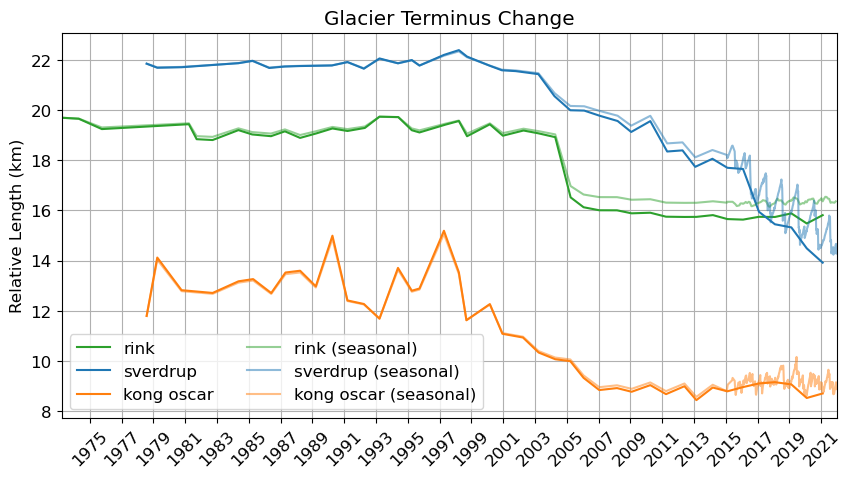

In [4]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 12

plt.plot(rink_annual_df.date, rink_annual_df['length (km)'], label='rink', color='tab:green')
plt.plot(sver_annual_df.date, sver_annual_df['length (km)'], label='sverdrup', color='tab:blue')
plt.plot(ko_annual_df.date, ko_annual_df['length (km)'], label='kong oscar', color='tab:orange')

## the annual and seasonal length measurments are on different relative length scales (i.e., the starting magnitude is different)
# so we need to match the two datasets

# subtract difference
rink_diff = rink_annual_df['length (km)'][0] - rink_seasonal_df['length (km)'][0]
sver_diff = sver_annual_df['length (km)'][0] - sver_seasonal_df['length (km)'][0]
ko_diff = ko_annual_df['length (km)'][0] - ko_seasonal_df['length (km)'][0]

# rink_seasonal_df_adjust = rink_seasonal_df['length (km)'] + rink_diff
# sver_seasonal_df_adjust = sver_seasonal_df['length (km)'] + sver_diff
# ko_seasonal_df_adjust = ko_seasonal_df['length (km)'] + ko_diff

plt.plot(rink_seasonal_df.date, rink_seasonal_df['length (km)']+rink_diff, '-', markersize=3, label='rink (seasonal)', color='tab:green', alpha=0.5)
plt.plot(sver_seasonal_df.date, sver_seasonal_df['length (km)']+sver_diff, '-', markersize=3, label='sverdrup (seasonal)', color='tab:blue', alpha=0.5)
plt.plot(ko_seasonal_df.date, ko_seasonal_df['length (km)']+ko_diff, '-', markersize=3, label='kong oscar (seasonal)', color='tab:orange', alpha=0.5)

# plt.plot(rink_seasonal_df.date[37:], rink_seasonal_df['length (km)'][37:]-rink_annual_df['length (km)'][37], '-o', markersize=3, label='rink', color='tab:green')
# plt.plot(sver_seasonal_df.date[34:], sver_seasonal_df['length (km)'][34:]-sver_annual_df['length (km)'][37], '-o', markersize=3, label='sverdrup', color='tab:blue')
# plt.plot(ko_seasonal_df.date[35:], ko_seasonal_df['length (km)'][35:]-ko_annual_df['length (km)'][37], '-o', markersize=3, label='kong oscar', color='tab:orange')

plt.title('Glacier Terminus Change')
plt.ylabel("Relative Length (km)")
years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend(loc='lower left',ncol=2)
plt.margins(x=0)
plt.grid()

# plt.savefig("figures/Glacier_plots/glacier_length.png", bbox_inches='tight', dpi=300, facecolor='white')

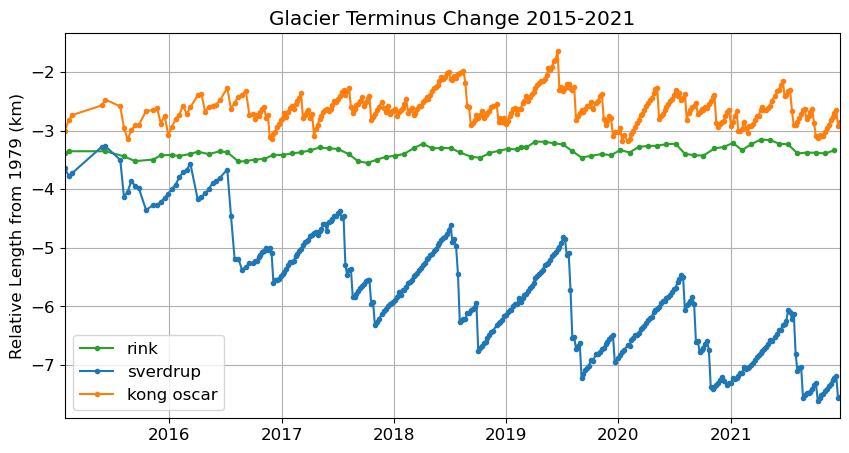

In [5]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 12

plt.plot(rink_seasonal_df.date[37:], rink_seasonal_df['length (km)'][37:]-rink_seasonal_df['length (km)'][0], '-o', markersize=3, label='rink', color='tab:green')
plt.plot(sver_seasonal_df.date[34:], sver_seasonal_df['length (km)'][34:]-sver_seasonal_df['length (km)'][0], '-o', markersize=3, label='sverdrup', color='tab:blue')
plt.plot(ko_seasonal_df.date[35:], ko_seasonal_df['length (km)'][35:]-ko_seasonal_df['length (km)'][0], '-o', markersize=3, label='kong oscar', color='tab:orange')

plt.title('Glacier Terminus Change 2015-2021')
plt.ylabel("Relative Length from 1979 (km)")
# years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
# plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend()
plt.margins(x=0)
plt.grid()

# plt.savefig("figures/Glacier_plots/glacier_length.png", bbox_inches='tight', dpi=300, facecolor='white')

In [7]:
rink_seasonal_df.date[68:93]

68   2018-01-05
69   2018-02-04
70   2018-03-06
71   2018-04-05
72   2018-05-05
73   2018-06-04
74   2018-07-04
75   2018-08-03
76   2018-09-08
77   2018-10-08
78   2018-11-07
79   2018-12-07
80   2019-01-06
81   2019-02-05
82   2019-02-17
83   2019-03-07
84   2019-04-06
85   2019-05-06
86   2019-06-05
87   2019-07-05
88   2019-08-04
89   2019-09-03
90   2019-10-03
91   2019-11-08
92   2019-12-08
Name: date, dtype: datetime64[ns]

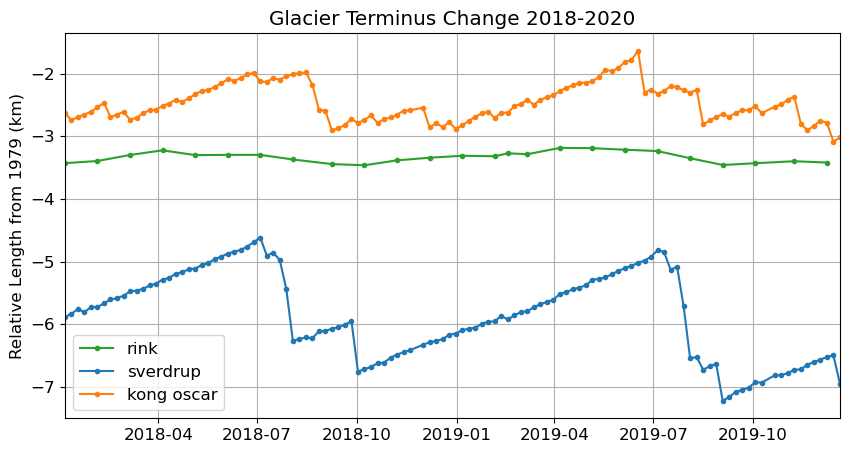

In [6]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 12

plt.plot(rink_seasonal_df.date[68:93], rink_seasonal_df['length (km)'][68:93]-rink_seasonal_df['length (km)'][0], '-o', markersize=3, label='rink', color='tab:green')
plt.plot(sver_seasonal_df.date[147:265], sver_seasonal_df['length (km)'][147:265]-sver_seasonal_df['length (km)'][0], '-o', markersize=3, label='sverdrup', color='tab:blue')
plt.plot(ko_seasonal_df.date[148:266], ko_seasonal_df['length (km)'][148:266]-ko_seasonal_df['length (km)'][0], '-o', markersize=3, label='kong oscar', color='tab:orange')

plt.title('Glacier Terminus Change 2018-2020')
plt.ylabel("Relative Length from 1979 (km)")
# years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
# plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend()
plt.margins(x=0)
plt.grid()

# plt.savefig("figures/Glacier_plots/glacier_length.png", bbox_inches='tight', dpi=300, facecolor='white')

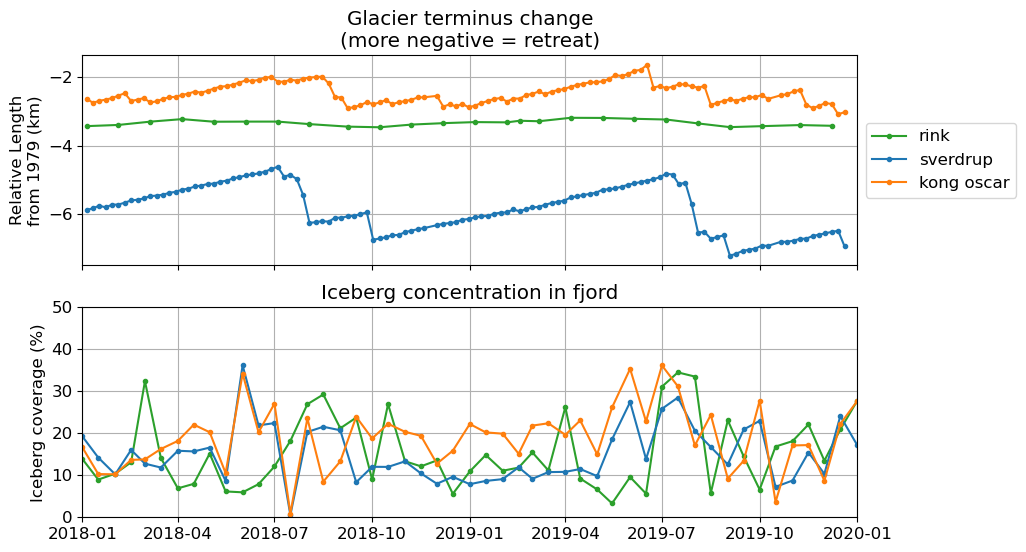

In [78]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['font.size'] = 12
fig, (ax1,ax2) = plt.subplots(2, sharex=True)

ax1.plot(rink_seasonal_df.date[68:93], rink_seasonal_df['length (km)'][68:93]-rink_seasonal_df['length (km)'][0], '-o', markersize=3, label='rink', color='tab:green')
ax1.plot(sver_seasonal_df.date[147:265], sver_seasonal_df['length (km)'][147:265]-sver_seasonal_df['length (km)'][0], '-o', markersize=3, label='sverdrup', color='tab:blue')
ax1.plot(ko_seasonal_df.date[148:266], ko_seasonal_df['length (km)'][148:266]-ko_seasonal_df['length (km)'][0], '-o', markersize=3, label='kong oscar', color='tab:orange')

ax1.set_xlim(np.datetime64('2018-01-01'),np.datetime64('2020-01-01'))

ax1.set_title('Glacier terminus change\n(more negative = retreat)')
ax1.set_ylabel("Relative Length\nfrom 1979 (km)")
# years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
# plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.margins(x=0)
ax1.grid()

# add iceberg data
ax2.set_title('Iceberg concentration in fjord')
ax2.set_ylabel("Iceberg coverage (%)")
ax2.plot(np.array(iceberg_rink_df['time'], dtype='datetime64'), iceberg_rink_df['iceberg_percent'],'o-',color='tab:green',  markersize=3)
ax2.plot(np.array(iceberg_sver_df['time'], dtype='datetime64'), iceberg_sver_df['iceberg_percent'],'o-',color='tab:blue',   markersize=3)
ax2.plot(np.array(iceberg_kong_df['time'], dtype='datetime64'), iceberg_kong_df['iceberg_percent'],'o-',color='tab:orange', markersize=3);
ax2.set_ylim(0,50)
ax2.grid()

# plt.savefig("figures/Glacier_plots/glacier_length.png", bbox_inches='tight', dpi=300, facecolor='white')

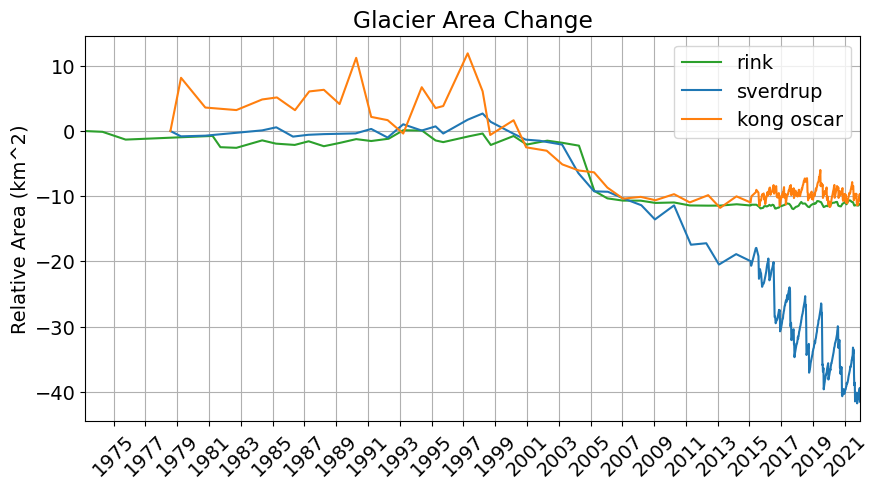

In [4]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 12

plt.plot(rink_seasonal_df.date, rink_seasonal_df['area (km2)']-rink_seasonal_df['area (km2)'][0], label='rink', color='tab:green')
plt.plot(sver_seasonal_df.date, sver_seasonal_df['area (km2)']-sver_seasonal_df['area (km2)'][0], label='sverdrup', color='tab:blue')
plt.plot(ko_seasonal_df.date, ko_seasonal_df['area (km2)']-ko_seasonal_df['area (km2)'][0], label='kong oscar', color='tab:orange')

plt.title('Glacier Area Change')
plt.ylabel("Relative Area (km^2)")
years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend()
plt.margins(x=0)
plt.grid()

# plt.savefig("figures/Glacier_plots/glacier_area.png", bbox_inches='tight', dpi=300, facecolor='white')

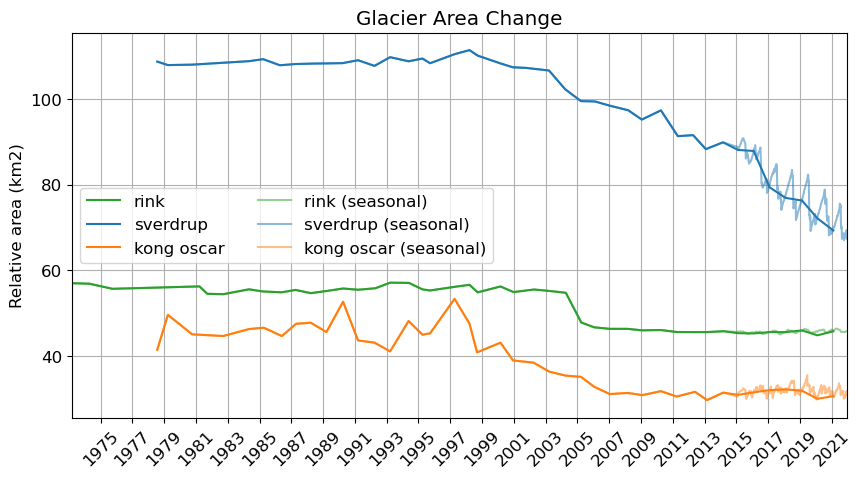

In [68]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 12

plt.plot(rink_annual_df.date, rink_annual_df['area (km2)'], label='rink', color='tab:green')
plt.plot(sver_annual_df.date, sver_annual_df['area (km2)'], label='sverdrup', color='tab:blue')
plt.plot(ko_annual_df.date, ko_annual_df['area (km2)'], label='kong oscar', color='tab:orange')

plt.plot(rink_seasonal_df.date, rink_seasonal_df['area (km2)'], '-', markersize=3, label='rink (seasonal)', color='tab:green', alpha=0.5)
plt.plot(sver_seasonal_df.date, sver_seasonal_df['area (km2)'], '-', markersize=3, label='sverdrup (seasonal)', color='tab:blue', alpha=0.5)
plt.plot(ko_seasonal_df.date, ko_seasonal_df['area (km2)'], '-', markersize=3, label='kong oscar (seasonal)', color='tab:orange', alpha=0.5)

plt.title('Glacier Area Change')
plt.ylabel("Relative area (km2)")
years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend(loc='best',ncol=2)
plt.margins(x=0)
plt.grid()

# plt.savefig("figures/Glacier_plots/glacier_area.png", bbox_inches='tight', dpi=300, facecolor='white')

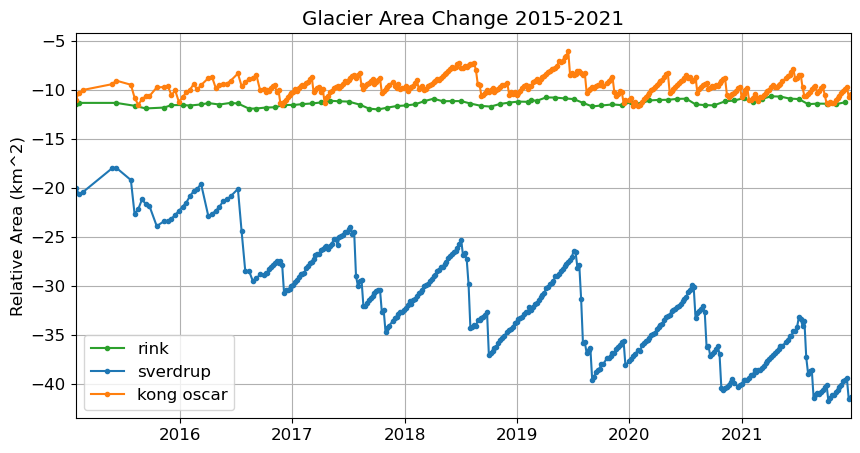

In [70]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 12

plt.plot(rink_seasonal_df.date[37:], rink_seasonal_df['area (km2)'][37:]-rink_seasonal_df['area (km2)'][0], '-o', markersize=3, label='rink', color='tab:green')
plt.plot(sver_seasonal_df.date[34:], sver_seasonal_df['area (km2)'][34:]-sver_seasonal_df['area (km2)'][0], '-o', markersize=3, label='sverdrup', color='tab:blue')
plt.plot(ko_seasonal_df.date[35:], ko_seasonal_df['area (km2)'][35:]-ko_seasonal_df['area (km2)'][0], '-o', markersize=3, label='kong oscar', color='tab:orange')

plt.title('Glacier Area Change 2015-2021')
plt.ylabel("Relative Area (km^2)")
# years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
# plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend()
plt.margins(x=0)
plt.grid()

# plt.savefig("figures/Glacier_plots/glacier_length.png", bbox_inches='tight', dpi=300, facecolor='white')

### Sample glacier length data at daily resolution and export to csv

In [13]:
glacier_len_rink = xr.DataArray(np.array(rink_seasonal_df['length (km)']), coords={'date': np.array(rink_seasonal_df['date'])}, dims='date')
glacier_len_ko   = xr.DataArray(np.array(ko_seasonal_df['length (km)']), coords={'date': np.array(ko_seasonal_df['date'])}, dims='date')
glacier_len_sver = xr.DataArray(np.array(sver_seasonal_df['length (km)']), coords={'date': np.array(sver_seasonal_df['date'])}, dims='date')

In [14]:
# sample at daily resolution and interpolate values that are missing
glacier_len_rink_interp = glacier_len_rink.resample(date='1D').interpolate("linear")
glacier_len_ko_interp = glacier_len_ko.resample(date='1D').interpolate("linear")
glacier_len_sver_interp = glacier_len_sver.resample(date='1D').interpolate("linear")

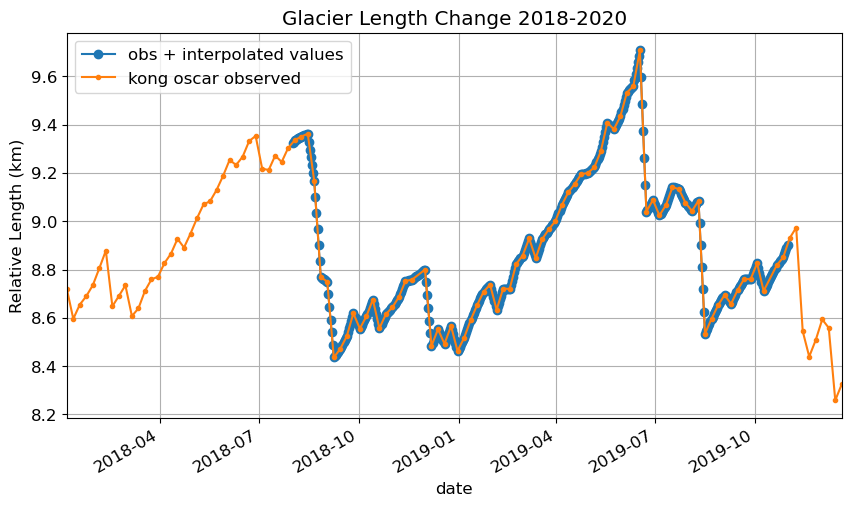

In [19]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 12

# plt.plot(rink_seasonal_df.date[68:93], rink_seasonal_df['area (km2)'][68:93]-rink_seasonal_df['area (km2)'][0], '-o', markersize=3, label='rink', color='tab:green')
# plt.plot(sver_seasonal_df.date[147:265], sver_seasonal_df['area (km2)'][147:265]-sver_seasonal_df['area (km2)'][0], '-o', markersize=3, label='sverdrup', color='tab:blue')
# plt.plot(ko_seasonal_df.date[148:266], ko_seasonal_df['area (km2)'][148:266]-ko_seasonal_df['area (km2)'][0], '-o', markersize=3, label='kong oscar', color='tab:orange')

glacier_len_ko_interp.sel(date=slice('2018-08-01','2019-10-31')).plot(marker='o', label='obs + interpolated values')
plt.plot(ko_seasonal_df.date[148:266], ko_seasonal_df['length (km)'][148:266], '-o', markersize=3, label='kong oscar observed', color='tab:orange')

plt.title('Glacier Length Change 2018-2020')
plt.ylabel("Relative Length (km)")
# years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
# plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend()
plt.margins(x=0)
plt.grid()

# plt.savefig("figures/Glacier_plots/glacier_length.png", bbox_inches='tight', dpi=300, facecolor='white')

In [25]:
# create dataframes and export csv files
rink_glacier_len_df_1D   = pd.DataFrame({'time': glacier_len_rink_interp.sel(date=slice('2018','2020')).date.values,\
                                         'glacier_length': glacier_len_rink_interp.sel(date=slice('2018','2020')).values})
ko_glacier_len_df_1D     = pd.DataFrame({'time': glacier_len_ko_interp.sel(date=slice('2018','2020')).date.values,\
                                         'glacier_length': glacier_len_ko_interp.sel(date=slice('2018','2020')).values})
sver_glacier_len_df_1D   = pd.DataFrame({'time': glacier_len_sver_interp.sel(date=slice('2018','2020')).date.values,\
                                         'glacier_length': glacier_len_sver_interp.sel(date=slice('2018','2020')).values})

rink_glacier_len_df_1D.to_csv('D:/Habitat_model_data/covariate_csv_files/glacier_length/rink_glacier_length_1D.csv', index=False)
ko_glacier_len_df_1D.to_csv('D:/Habitat_model_data/covariate_csv_files/glacier_length/kongoscar_glacier_length_1D.csv', index=False)
sver_glacier_len_df_1D.to_csv('D:/Habitat_model_data/covariate_csv_files/glacier_length/sverdrup_glacier_length_1D.csv', index=False)

In [26]:
rink_glacier_len_df_1D

,time,glacier_length
0,2018-01-01,13.467404
1,2018-01-02,13.467963
2,2018-01-03,13.468522
3,2018-01-04,13.469081
4,2018-01-05,13.469641
...,...,...
1091,2020-12-27,13.664289
1092,2020-12-28,13.666576
1093,2020-12-29,13.668862
1094,2020-12-30,13.671149
